In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob
interval = ["point125","point25","point5","point75"]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/"+interval[2]+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567655628gra745_file.csv
PLA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567655657gra745_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693783gra998_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693784gra1001_file.csv
Random: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655619gra744_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655648gra744_file.csv


## Old

In [5]:
all_combined_data = dict()
end_time = 10
end_step = end_time * 60 * 2

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))

    mode_combined_data = pd.DataFrame()
    for i in range(len(all_data_files[mode])):
        mode_combined_data["run"+str(i)] = mode_data[i].loc[mode_data[i]["Step"]<=end_step]["Value"]
    mode_combined_data["avg"] = mode_combined_data.mean(axis=1)
    mode_combined_data['std'] = mode_combined_data.std(axis=1)
#     mode_combined_data.head()
    all_combined_data[mode] = mode_combined_data

KeyError: 'Step'

In [6]:
all_combined_data['SARA']

KeyError: 'SARA'

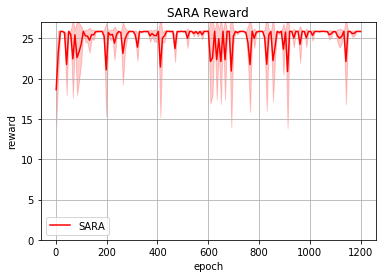

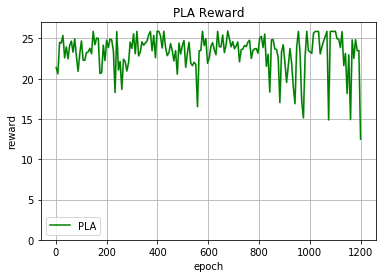

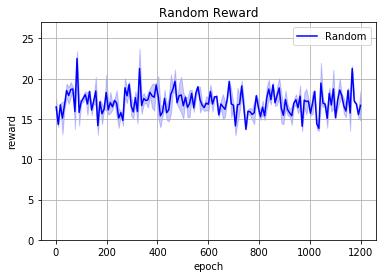

In [28]:
# Plot mean and std
names = ["SARA","PLA","Random"]
colors = ['r','g','b']

for name, c in zip(names, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[name]
    length = data.shape[0]
    plt.fill_between(np.linspace(1,1200,length), data['avg'] - data['std'],
                 data['avg'] + data['std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1200,length), data['avg'], '-', color=c,
         label=name)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} Reward'.format(name))
    plt.xlabel("epoch")
    plt.ylabel("reward")


## New

In [7]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[2]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/"+itv+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567655628gra745_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567753274gra104_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_SARA_1567753274gra643_file.csv
PLA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567655657gra745_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693783gra998_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_PLA_1567693784gra1001_file.csv
Random: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655619gra744_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/point5\run_Random_1567655648gra744_file.csv


In [8]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))

    mode_combined_data = pd.DataFrame()
    for i in range(len(all_data_files[mode])):
        mode_combined_data["run"+str(i)] = mode_data[i]["value"]
    mode_combined_data["avg"] = mode_combined_data.mean(axis=1)
    mode_combined_data['std'] = mode_combined_data.std(axis=1)
#     mode_combined_data.head()
    all_combined_data[mode] = mode_combined_data

In [9]:
all_combined_data['PLA']

,run0,run1,run2,avg,std
0,0.000000,0.320797,0.887972,0.402923,0.367135
1,9.700189,0.510140,8.101108,6.103812,4.008835
2,17.803249,3.065306,6.652970,9.173842,6.275234
3,9.588784,13.566447,10.530631,11.228621,1.697222
4,8.219439,7.584351,14.304849,10.036213,3.029497
5,6.662225,0.360757,0.658026,2.560336,2.903011
6,14.975967,0.000000,14.156590,9.710852,6.874753
7,1.552563,15.475491,20.783012,12.603689,8.109171
8,11.741917,8.079393,6.678082,8.833131,2.134900
9,6.606953,6.417610,14.141557,9.055373,3.597306


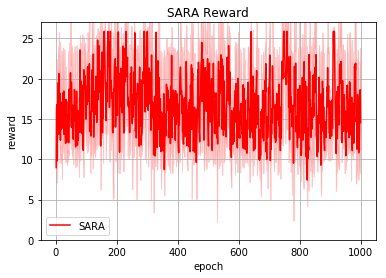

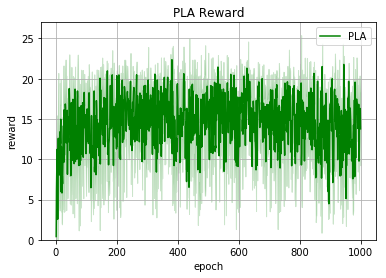

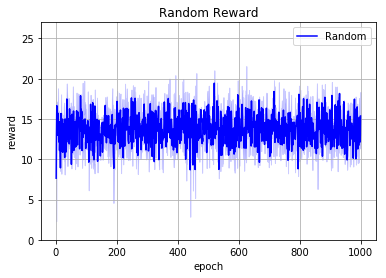

In [10]:
# Plot mean and std
names = ["SARA","PLA","Random"]
colors = ['r','g','b']

for name, c in zip(names, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[name]
    length = data.shape[0]
    plt.fill_between(np.linspace(1,1000,length), data['avg'] - data['std'],
                 data['avg'] + data['std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data['avg'], '-', color=c,
         label=name)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} Reward'.format(name))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/{}_{}.png'.format(itv,name), bbox_inches='tight')
